In [1]:
import math
import datasets
import IBM1 as ibm1
import debug_helpers
import convergence_criterion as cc
import persistence
import plots
import evaluate

# pretty print variabeles on line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
def fname_ibm1(fname):
    return f'IBM1_output/{fname}'

# HACK: store converged models during the iteration run
AER_scores = {}
llhood_scores = {}
def save_selected_models(i, llhood, AER, prev_llhood, prev_AER, lprobs):
    mname = 'IBM1'
    debug_helpers.print_likelihood(i, [], llhood, AER)
    if prev_AER and (mname not in AER_scores) and cc.has_converged_AER(prev_AER, AER):
        persistence.save_ibm1_model(lprobs, fname_ibm1(f'params_AER_{i}.txt'))
        AER_scores[mname] = AER
    if prev_llhood and (mname not in llhood_scores) and cc.has_converged_LLhood(prev_llhood, llhood):
        persistence.save_ibm1_model(lprobs, fname_ibm1(f'params_llhood_{i}.txt'))
        llhood_scores[mname] = llhood

def run_em_with_initialization(
    s_t_pairs, val_sentence_pairs, reference_alignments):

    # EM
    (lprobs, llhoods, AERs) = ibm1.EM(
        s_t_pairs, 16,
        val_sentence_pairs, reference_alignments, 
        save_selected_models
    ) 
    
    # store AER and llhood scores in file
    persistence.save(AERs, fname_ibm1(f'AERs.txt'))
    persistence.save(llhoods, fname_ibm1(f'llhoods.txt'))

    # select models based on AER and llhood selection criterion
    selected_model_AER = fname_ibm1(cc.select_model_AER(AERs))
    selected_model_llhood = fname_ibm1(cc.select_model_LLhood(llhoods))
    print(f'model selected on AER:', selected_model_AER)
    print(f'model selected on LLhood:', selected_model_llhood)
        

In [13]:
# train model
# (training_pairs, validation_pairs, test_pairs) = persistence.get_preprocessed_sentence_pairs()
# reference_alignments = datasets.validation_alignments()    

training_pairs, _, _ = datasets.example_data_word_order()
validation_pairs = None
reference_alignments = None    

AER_scores = {}
llhood_scores = {}

run_em_with_initialization(
    training_pairs, validation_pairs, reference_alignments)



iteration    log_likelihood    AER    time
0 -21.847 0.00000 08:50
1 -19.045 0.00000 08:50
2 -17.119 0.00000 08:50
3 -15.838 0.00000 08:50
4 -15.115 0.00000 08:50
5 -14.742 0.00000 08:50
6 -14.556 0.00000 08:50
7 -14.461 0.00000 08:50
8 -14.411 0.00000 08:50
9 -14.383 0.00000 08:50
10 -14.366 0.00000 08:50
11 -14.356 0.00000 08:50
12 -14.349 0.00000 08:50
13 -14.344 0.00000 08:50
14 -14.341 0.00000 08:50
15 -14.339 0.00000 08:50
model selected on AER: IBM1_output/None
model selected on LLhood: IBM1_output/11


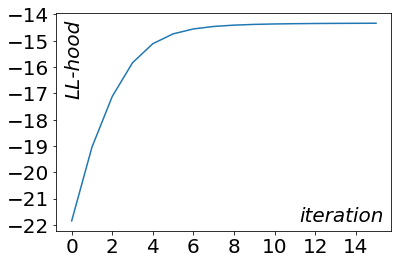

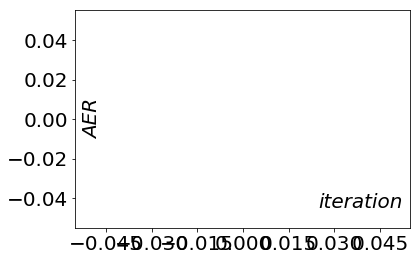

In [14]:
# plot AER and llhood scores vs iteration
llhoods = persistence.load(fname_ibm1(f'llhoods.txt'))
AERs = persistence.load(fname_ibm1('AERs.txt'))
plots.figure_log_likelihood(llhoods, fname_ibm1('IBM1_LL.png'))
plots.figure_AER(AERs, fname_ibm1('IBM1_AER.png'))


In [ ]:
def evaluate_IBM1_model(test_sentence_pairs, path_to_model, model_name):
    lprobs = persistence.load_ibm1_model(path_to_model)
    alignments = ibm1.align(lprobs, test_sentence_pairs)
    evaluate.evaluate_alignments_testset(model_name, alignments)    

model_name_AER = 'IBM1_AER'
path_to_AER_model = f'params_AER_{i}.txt'
evaluate_IBM1_model(test_pairs, path_to_AER_model, 'IBM1_AER')

model_name_LL = 'IBM1_LL'
path_to_LL_model = f'params_llhood_{j}.txt'
evaluate_IBM1_model(test_pairs, path_to_LL_model, 'IBM1_LL')